# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import time
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#--NotebookApp.iopub_data_rate_limit =1.0e10

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# load twitter_archieve data into pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# make request to udacity server for image_prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)

# store response content to a file in the jupypter environment
with open('image_predictions.tsv', 'wb') as file:
    file.write(data.content)

# load stored image_prediction file into pandas dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# fetch tweet data using tweepy
tweet_ids = list(twitter_archive.tweet_id)
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

# authenticating the request
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True )
for tweet_id in tweet_ids:
    try:
        start = time.time()
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        end = time.time()
        print(str(tweet_id)+ " -"+str(start - end)) # reponse time duration
        tweet_string = json.dumps(tweet._json)
        
        # write tweet data to json_tweet.txt file
        with open('json-tweet.txt', 'a') as file:
            file.write(tweet_string)
            file.write('\n')
    except Exception as err:
        print(str(tweet_id)+" -"+str(err))


In [5]:
#load tweet json data from file into pandas datafram

with open('json-tweet.txt', 'rb') as file:
    tweets = [json.loads(tweet) for tweet in file]
tweets_df = pd.DataFrame(tweets)

## Assessing Data
In this section, we will be assessing our datasets for quality and tidiness issue using both visual and programmatic assessments.

## Twitter archive dataset

In [6]:
# gain overview of dataset for programatic accessement
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# record counts
twitter_archive.shape

(2356, 17)

In [8]:
# column info and data types
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# descriptive statistics for numerical columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check for duplicate tweets
twitter_archive.duplicated(subset='tweet_id').sum()


0

In [11]:
# check columns in twitter_archive duplicated in the other datasets
column_titles = pd.Series(list(twitter_archive) + list(image_predictions) + \
list(tweets_df))
duplicated_columns = column_titles[column_titles.duplicated()]
duplicated_columns

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

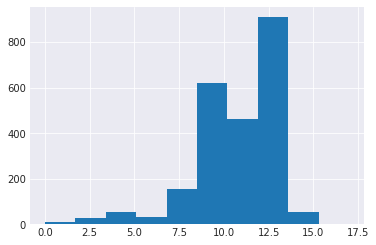

In [12]:
# overview of ratings numerator distribution
twitter_archive.query('rating_numerator < 20').rating_numerator.hist() #filter outliers

From the above histogram, we see that most dogs posted received ratings of between 12 and 13 for numerator rating value.

## Image prediction dataset

In [13]:
# gain overview of dataset for programatic accessement
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# record counts
image_predictions.shape

(2075, 12)

In [15]:
# descriptive statistics for numerical columns
image_predictions.describe()  

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# column info and data types
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# check for duplicate predictions
image_predictions.duplicated(subset='tweet_id').sum()

0

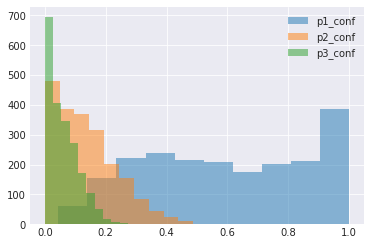

In [18]:
# overview of ratings numerator distribution
image_predictions['p1_conf'].hist(alpha=0.5, label='p1_conf')
image_predictions['p2_conf'].hist(alpha=0.5, label='p2_conf')
image_predictions['p3_conf'].hist(alpha=0.5, label='p3_conf')
plt.legend()

From the figure above, p1 confidence value have higher variation/spread compared to the other predictions from the neural network algorithm. for each tweet will be using predicted dog name with higher confidence value.

## Tweets dataset

In [19]:
# gain overview of dataset for programatic accessement
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33855,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7024,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29362,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5303,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22082,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3487,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36982,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7236,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35358,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,7774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
# record counts
tweets_df.shape

(2327, 32)

In [21]:
# descriptive statistics for numerical columns
tweets_df.describe()  

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2327.000000,2.327000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2327.000000
mean,7062.817361,7.417930e+17,7.440692e+17,2.040329e+16,8.113972e+17,2475.501934
std,10975.560279,6.820795e+16,7.524295e+16,1.260797e+17,6.295843e+16,4191.963712
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1225.000000,6.781394e+17,6.757073e+17,3.589728e+08,7.761338e+17,496.000000
50%,3054.000000,7.178418e+17,7.032559e+17,4.196984e+09,8.281173e+17,1151.000000
75%,8615.500000,7.986547e+17,8.233264e+17,4.196984e+09,8.637581e+17,2866.000000
max,145083.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,70878.000000


In [22]:
# column info and data types
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2327 non-null object
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null object
id                               2327 non-null int64
id_str                           2327 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [23]:
# check for duplicate tweets
tweets_df.duplicated(subset='id').sum()

0

### Quality issues
`Twitter archive` table
1. Extraneous data; retweets and reply part of archive dataset.

2. Incorrect dog name "a" as a result of erroneous extractions or non-dog rating.

3. Missing dog name/ dog stages. This will be handled in issue 1.

4. Columns contains invalid types "None".

5. `timestamp` column is of type str and not datetime.  

6. Incorrect numerator rating of 1776 for Atticus.

7. Missing tweet data (favorite and retweet count) for tweet_id in twitter_archive. mostly for deleted tweet data.

`image_predictions` table
8. Inconsistent case; `p1`, `p2`, `p3` columns contains lowercase sometime and capitalized other times.

9. `p1`, `p2`, `p3` columns are str data type instead of category.

10. predicted dog name column `p1`, `p2`, `p3` contains names other than dog names. this will be taking care of when addressing tidiness issues

### Tidiness issues
`Twitter archieve` table
1. dog stages in different columns `doggo`, `floofer`, `pupper`, and `puppo`

`Image prediction` table
2. more than one dog breeds predictions `p1`, `p2`, `p2` for different confidence level

`Tweet dataset`
3. column title for tweet id `id` differs from all the other datasets

4. `tweets_df` dataset is of thesame observation type as `twitter_archive`

## Cleaning Data
In this section, we will execute code to clean **all** of the issues documented while assessing. 


In [24]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_df_clean = tweets_df.copy()

### Sequence for cleaning

1. `Missing/extraneous data`

2. `Tidyness issues`

3. `Quality issues`


### Cleaning: Missing/Extraneous data

### Issue #1:

#### Define:
- remove records in `twitter_archive` table where record is a retweet, reply or a tweet that is not a dog rating. these records have missing dog name, retweet id or reply id.

#### Code

In [25]:
twitter_archive_clean = twitter_archive_clean.query('name != "None" & in_reply_to_status_id == "NAN" & retweeted_status_id == "NAN"')

#### Test

In [26]:
twitter_archive_clean.query('name == "None" & in_reply_to_status_id != "NAN" & retweeted_status_id != "NAN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define

- drop records where dog name is "a". few are as result of erroneous extraction due to inconsistent text format but majority are non-dog rating tweet.

#### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name'] != "a"]

#### Test

In [28]:
twitter_archive_clean.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define

- replace all "None" in the dataset with NAN

#### Code

In [29]:
twitter_archive_clean = twitter_archive_clean.replace('None', np.nan)

#### Test

In [30]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


## Cleaning; Tidiness Issues

### Issue #1:

#### Define

- Define a column `stage` to hold dog stage names in `twitter_archive` using stage names in tweet text.
- Drop `doggo`, `floofer`, `pupper`, and `puppo` columns from `twitter_archive` dataset

#### Code

In [31]:
# create 'stage' column using stage name in tweet text
# create a list of dog stages
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

#define a function to return stage name where available
def stage_name(text):
    for name in dog_stage:
        if name in text:
            return name
    return np.nan

twitter_archive_clean['stage'] = twitter_archive_clean.text.apply(stage_name)

# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
            

#### Test

In [32]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #2:

#### Define

- Extract subset of image prediction that are dog breeds (p*_dog = True) for each prediction and confidence level `p1_conf`, `p2_conf`, `p3_conf` to new datasets.
- Rename columns for all sub-datasets to common names
- Append all three confidence level sub-dataset to form a dataset with all dog name predictions.
- Sort appended datasets on tweet_id and prediction confidence value in descending order.
- Remove duplicate tweet_id to keep only predictions with the highest confidence value.


#### Code

In [33]:
# extract subset of image predictions for each confidence level
# remove all predictions that are not dog breeds.

def get_subset(dataset, prediction_no):
    """
        extract subset of image predictions for each confidence level
        remove all predictions that are not dog breeds
    """
    p_conf_df = image_predictions_clean[['tweet_id', 'jpg_url', 'p{}'.format(prediction_no), 'p{}_conf'.format(prediction_no),\
                                          'p{}_dog'.format(prediction_no)]]
    p_conf_df = p_conf_df.query('p{}_dog == True'.format(prediction_no))
    
    return p_conf_df
    
# extract sub-datasets based on confidence level
p1_conf_df = get_subset(image_predictions_clean, 1)
p2_conf_df = get_subset(image_predictions_clean, 2)
p3_conf_df = get_subset(image_predictions_clean, 3)

In [34]:
# rename sub-datasets columns to generic/common names for appending
p1_conf_df = p1_conf_df.rename(columns={'p1': 'breed', 'p1_conf': 'p_conf', 'p1_dog': 'p_dog'})
p2_conf_df = p2_conf_df.rename(columns={'p2': 'breed', 'p2_conf': 'p_conf', 'p2_dog': 'p_dog'})
p3_conf_df = p3_conf_df.rename(columns={'p3': 'breed', 'p3_conf': 'p_conf', 'p3_dog': 'p_dog'})

In [35]:
# append all predictions datasets
image_predictions_clean = pd.concat([p1_conf_df, p2_conf_df, p3_conf_df])


In [36]:
# sort on tweet_id and p_conf level in decending order
image_predictions_clean = image_predictions_clean.sort_values(by=['tweet_id', 'p_conf'], ascending=False)
image_predictions_clean.head()

,tweet_id,jpg_url,breed,p_conf,p_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,0.090647,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,0.068957,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,malamute,0.078253,True


In [37]:
# drop predictions for duplicate tweet_id thus selecting prediction with highest confidence value
image_predictions_clean = image_predictions_clean.drop_duplicates(subset='tweet_id')

#### Test

In [38]:
image_predictions_clean.head()

,tweet_id,jpg_url,breed,p_conf,p_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True


### Issue #3:

#### Define

- rename column `id` in `tweets_df` to "tweet_id"

#### Code

In [39]:
# select only relevant column

tweets_df_clean = tweets_df_clean[['id', 'favorite_count', 'retweet_count']]

In [40]:
# rename id column title to tweet_id

tweets_df_clean = tweets_df_clean.rename(columns={'id':'tweet_id'})

#### Test

In [41]:
tweets_df_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33855,7024
1,892177421306343426,29362,5303
2,891815181378084864,22082,3487
3,891689557279858688,36982,7236
4,891327558926688256,35358,7774


### Issue #4:

#### Define

- Combine both `twitter_archive` and `tweet_df` into one observational type using tweet_id

#### Code

In [42]:
# join twitter_archive and tweets_df
twitter_archive_clean = twitter_archive_clean.iloc[:, np.r_[0, 3, 5, 9:14]] # extract only relevant columns for analysis.
twitter_archive_clean = twitter_archive_clean.merge(tweets_df_clean, on='tweet_id', how='left')

#### Test

In [43]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33855.0,7024.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29362.0,5303.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22082.0,3487.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36982.0,7236.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35358.0,7774.0


### Cleaning; Quality Issues

### Issue #5:

#### Define
- convert `timestamp` column from str to datetime

#### Code

In [44]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [45]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #6:

#### Define
- replace outlier value of 1776 numerator ratings for Atticus with mean rating numerator

#### Code

In [46]:
index = twitter_archive_clean.query('name == "Atticus" & rating_numerator== 1776').index
mean = int(twitter_archive_clean.rating_numerator.mean())
twitter_archive_clean.loc[index,'rating_numerator'] = mean

#### Test

In [47]:
twitter_archive_clean.loc[index,:]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
596,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,12,10,Atticus,NaN,4791.0,2281.0


### Issue 7#:

#### Define
- replace missing value for favorite and retweet count with mean of the respective column

#### code

In [48]:
# get mean value for favorite and retweet column
mean_favorite = int(twitter_archive_clean.favorite_count.mean())
mean_retweet = int(twitter_archive_clean.retweet_count.mean())

# fillna with mean values
twitter_archive_clean.favorite_count = twitter_archive_clean.\
favorite_count.fillna(mean_favorite)
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.fillna(mean_retweet)

#### Test

In [49]:
twitter_archive_clean[['favorite_count', 'retweet_count']].isnull().sum()

favorite_count    0
retweet_count     0
dtype: int64

### Issue #8:

#### Define
- capitalize all values in the `breed` column in `image_prediction` dataset

#### Code

In [50]:
image_predictions_clean.breed = image_predictions_clean.breed.\
apply(lambda x: x.capitalize())

#### Test

In [51]:
image_predictions_clean.head()

,tweet_id,jpg_url,breed,p_conf,p_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,True


### Issue #9:

#### Define
- Convert data type for `breed` column from str to category.

#### Code

In [52]:
image_predictions_clean = image_predictions_clean.astype({'breed': 'category'})

#### Test

In [53]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 2073 to 0
Data columns (total 5 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
breed       1751 non-null category
p_conf      1751 non-null float64
p_dog       1751 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(1)
memory usage: 64.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
# save clean twitter archive dataset to csv file

twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In this section, using our wrangled data, will attempt to answer the following questions about tweets by @WeRateDogs user using descriptive statistics and visualisations;

- Which dog breed is most popular.

- Which dog breeds are most likeable based on favorite counts.

- Which dog breads has the highest average ratings.

- Is the likability (favorite counts) for a particular dog breed influenced by the number of retweets by followers.

### Question; which breed is the most popular?

In [55]:
# combine the master twitter archive dataset with image prediction dataset
prediction_df = image_predictions_clean[['tweet_id', 'jpg_url', 'breed']]  # extract relevant columns.
twitter_archive_clean = twitter_archive_clean.merge(prediction_df, on='tweet_id', how="left")
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33855.0,7024.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29362.0,5303.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22082.0,3487.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36982.0,7236.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35358.0,7774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset


In [56]:
top_10_breeds = twitter_archive_clean.breed.value_counts()[:10]
top_10_breeds

Golden_retriever      109
Labrador_retriever     74
Pembroke               71
Chihuahua              67
Pug                    47
Toy_poodle             39
Chow                   37
Pomeranian             29
French_bulldog         26
Samoyed                25
Name: breed, dtype: int64

In [57]:
# define function to create bar chart for code reuse.

def draw_bar(dataframe, label_ang=90, ylabel="", xlabel="", title=""):
    dataframe.plot(kind='bar', color= '#0088cc', rot=label_ang)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

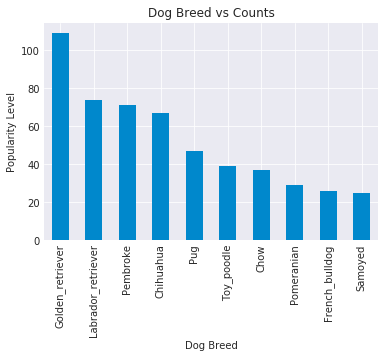

In [58]:
# visualize top popular breed
draw_bar(top_10_breeds, xlabel= 'Dog Breed', ylabel='Popularity Level', title= 'Dog Breed vs Counts')

From the above figure, the Golden retriever dog is the most popular breed based on count of tweets that contains pictures of this breed. this may be due to their varsitile utility in hunting, field work, as guides for the blind, and in search-and-rescue. A total of 109 record in our tweet archive contain the Golden retriever breed data.

### Question; which dog breeds are most likeable

In [59]:
# get average favorite count per breed

mean_favorite = twitter_archive_clean.groupby('breed')['favorite_count'].mean()
top_5_favorite = mean_favorite.nlargest(5)
top_5_favorite

breed
English_springer      25392.000000
Saluki                23913.333333
French_bulldog        18193.192308
Bedlington_terrier    16086.333333
Briard                15746.000000
Name: favorite_count, dtype: float64

Text(0.5,0,'avg favorite count')

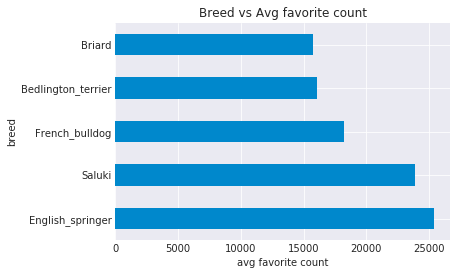

In [60]:
# vasualize top five breeds with most average favorite counts.
top_5_favorite.plot.barh(x='Breed', y='avg count', color='#0088cc')
plt.title('Breed vs Avg favorite count')
plt.xlabel('avg favorite count')

From the horizontal bar chart above, we see that English Springer spaniel dogs are the most adorable breed as seen by the highest average likes per tweet received for each posting of the English springer. one reason for this may be because spaniels are sport dogs that are activity driven. photos of these dogs engaging in sport activities will be an adorable sight. this is closely followed by the Saluki breed. the French bulldog, Bedington terrier and Briard makes up the top five for breeds with most likes.

### Question; Which dog breeds have the highest average ratings

In [61]:
# get average rating numerator value for each dog breed

top_10_ratings = twitter_archive_clean.groupby('breed').rating_numerator.mean().nlargest(10)
top_10_ratings

breed
Clumber           27.000000
Siberian_husky    13.315789
Pomeranian        13.103448
Appenzeller       13.000000
Border_terrier    12.333333
Saluki            12.333333
Briard            12.000000
Gordon_setter     12.000000
Irish_setter      12.000000
Silky_terrier     12.000000
Name: rating_numerator, dtype: float64

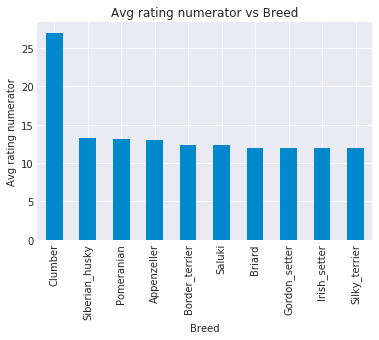

In [62]:
# visualize breeds with top 10 ratings

draw_bar(top_10_ratings, xlabel='Breed', ylabel='Avg rating numerator', title="Avg rating numerator vs Breed")

From the bar chart above, The Clumber breed has the highest average rating numerator of 27.0. The Siberian_husky, Pomeranian, Appenzeller, Border_terrier, Saluki, Briard, Gordon_setter, Irish_setter, Silky_terrier makes up the top 10 avg rating numerator with an avg of 12.5 ratings.

### Question; Is the likability (favorite counts) for a particular dog breed influenced by the number of retweets by followers.

Text(0.5,1,'retweet vs favorite count')

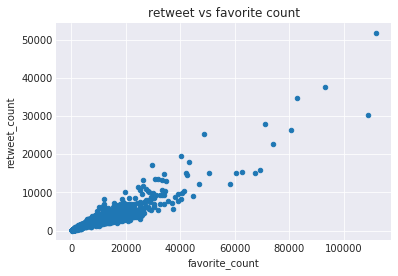

In [63]:
# visualize relationship between favorite count and retweet count
twitter_archive_clean.plot.scatter(x='favorite_count', y='retweet_count')
plt.title('retweet vs favorite count')

the scatter plot above shows a strong positive correlation between the likability (favorite count) of a dog tweet and the count of retweets it receives from other twitter users. the higher the retweets the higher the favorite count as more users can view and like the tweet due to increased exposure.

### Insights:
From the analysis and visualization of the wrangled @WeRateDogs twitter archive data, we can derive the following insights.
1. Golden retriever is the most popular breed based on the number of tweets that contains pictures of this breed. if you want a dog preferred by most people that you can engage in sport activities then this breed is for you.

2. The English Springer spaniel dogs are the most adorable breed as seen by the highest average likes(favorite) per tweet.

3. The Clumber breed has the highest average rating numerator of 27.0

4. There is a positive correlation between the likability (favorite count) of a dog tweet and the count of retweets it receives from other twitter users.

##### it is important to note that these insights are tentative as we do not have enough data to draw the above conclusions.

#### Limitations:
- The dog stage wasn't considered in this analysis as this information is not available for a significant portion of our twitter archive data. considering this variable would not have provided accurate representation of our data.
- Due to the inconsistence tweet text format from which dog names were extracted, a few of records in the twitter archive had incorrect dog name and were dropped from our dataset since they were insignificant.